## Content

- **Array Merging**
    - Merging Arrays - `hstack()`, `vstack()`, `concatenate()`

- **Installation of pandas** 
    - Importing pandas
    - Importing the dataset 
    - Dataframe/Series
  
- **Basic ops on a DataFrame** 
    - df.info()
    - df.head()
    - df.tail()
    - df.shape()
- **Creating Dataframe from Scratch**

- **Basic ops on columns** 
    - Different ways of accessing cols
    - Check for Unique values

In [ ]:
import numpy as np

### Stacking
#### Let's say we have an array and we want to stack it like this:



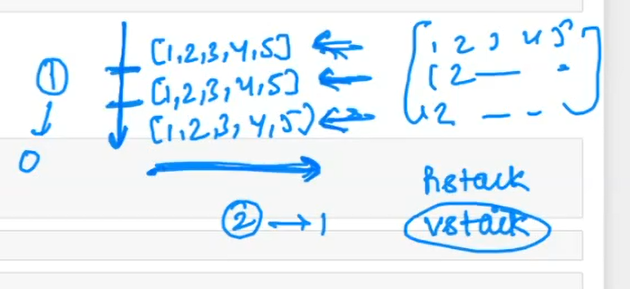

#### Will we use `vstack()` or `hstack()`?

#### Along which axis the operation is happening?

- Vertical axis

- So, we'll use `vstack()`

#### `np.vstack()`

- Stacks a list of arrays **vertically (along axis 0 or 1st axis)**


- For **example**, **given a list of row vectors, appends the rows to form a matrix**.

In [ ]:
data = np.arange(5)
data

array([0, 1, 2, 3, 4])

In [ ]:
np.vstack((data, data, data))

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### Now, What if we want to stack the array like this?

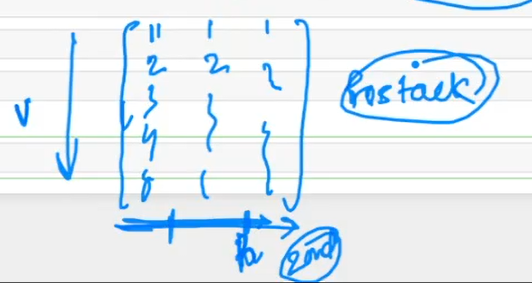

- Operation or **change is happening along horizontal axis**

- So, we'll use `hstack()`

#### `np.hstack()`

- Stacks a list of arrays horizontally (along axis 1)

- For **example**, **given a list of column vectors, appends the columns to form a matrix**.

In [ ]:
data = np.arange(5).reshape(5,1)
data

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [ ]:
np.hstack((data, data, data))

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

#### Now, Let's look at a more generalized way of stacking arrays

### `np.concatenate()`

- Creates a new array by appending arrays after each other, along a given axis

- Provides similar functionality, but it takes a **keyword argument `axis`** that specifies the **axis along which the arrays are to be concatenated**.

#### Input array to `concatenate()` needs to be of dimensions atleast equal to the dimensions of output array

In [ ]:
z = np.array([[2, 4]])
z

array([[2, 4]])

In [ ]:
z.ndim

2

In [ ]:
zz = np.concatenate([z, z], axis=0)
zz

array([[2, 4],
       [2, 4]])

In [ ]:
zz = np.concatenate([z, z], axis=1)
zz

array([[2, 4, 2, 4]])

#### Let's look at a few more examples using `np.concatenate()`

#### Question: What will be the output of this?
```
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
```

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [ ]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [ ]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

#### Now, How did it work?

- Dimensions of `a` is $2\times2$

#### What is the dimensions of `b` ?

- 1-D array ?? - **NO**

- Look carefully!!

- **`b` is a 2-D array of dimensions $1\times2$**

#### `axis = 0` ---> It's a vertical axis

- So, **changes will happen along vertical axis**

- So, **`b` gets concatenated below `a`**

#### Now, What if we do NOT provide an axis along which to concatenate?



In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=None)

array([1, 2, 3, 4, 5, 6])

#### Can you see what happened here?

- When we **don't specify the axis (`axis=None`)**, `np.concatenate()` **flattens the arrays and concatenates them as 1-D row array**

## Importing Pandas 

- You should be able to import Pandas after installing it


- We'll import `pandas` as its **alias name `pd`**

In [ ]:
import pandas as pd
import numpy as np

## Introduction: Why to use Pandas? 


#### How is it different from numpy ?

  - The major **limitation of numpy** is that it can only work with 1 datatype at a time

  - Most real-world datasets contain a mixture of different datatypes 
    - Like **names of places would be string** but their **population would be int**
  
==> It is **difficult to work** with data having **heterogeneous values using Numpy**

#### Pandas can work with numbers and strings together

<!-- - If our **data has only numbers**, we are better off using **Numpy** 
  - It's **lighter** and **easier**

- But if our data has both **number and non-number vals**, it makes sense to use **Pandas** -->

So lets see how we can use pandas



## Imagine that you are a Data Scientist with McKinsey



  - McKinsey wants to understand the relation between **GDP per capita** and **life expectancy** and various trends for their clients.
  - The company has acquired **data from multiple surveys** in different countries in the past
  - This contains info of several years about:
   - country
   - population size
   - life expectancy
   - GDP per Capita
  - We have to analyse the data and draw **inferences** meaningful to the company

## Reading dataset in Pandas

Link:https://drive.google.com/file/d/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_/view?usp=sharing

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_" -O gapminder.csv

--2022-09-30 07:47:34--  https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_
Resolving drive.google.com (drive.google.com)... 142.250.141.113, 142.250.141.139, 142.250.141.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/itr81pvl10ocoh32lble1lajblq4u4a4/1664524050000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=56db763a-80f7-441b-b0fa-733eff3afa7e [following]
--2022-09-30 07:47:35--  https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/itr81pvl10ocoh32lble1lajblq4u4a4/1664524050000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=56db763a-80f7-441b-b0fa-733eff3afa7e
Resolving doc-0s-68-docs.googleusercontent.com (doc-0s-68-docs.googleusercontent.com)... 142.251.2.132, 26

#### Now how should we read this dataset?

Pandas makes it very easy to work with these kinds of files



In [ ]:
df = pd.read_csv('gapminder.csv') # We are storing the data in df
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


## Dataframe and Series


#### What can we observe from the above dataset ?

We can see that it has:
  - 6 columns
  - 1704 rows 

#### What do you think is the datatype of `df` ?

In [ ]:
type(df)

pandas.core.frame.DataFrame

Its a **pandas DataFrame**

### What is a pandas DataFrame ?

  - It is a table-like representation of data in Pandas => Structured Data 
  - **Structured Data** here can be thought of as **tabular data in a proper order**
  - Considered as **counterpart of 2D-Matrix** in Numpy

#### Now how can we access a column, say `country` of the dataframe?

In [ ]:
df["country"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

As you can see we get all the values in the column **country**

#### Now what is the data-type of a column?

In [ ]:
type(df["country"])

pandas.core.series.Series

Its a **pandas Series**

### What is a pandas Series ?
  - **Series** in Pandas is what a **Vector** is in Numpy

#### What exactly does that mean?

  - It means a Series is a **single column** of **data**

  - **Multiple Series stack together to form a DataFrame**
  

Now we have understood what Series and DataFrames are 

#### What if a dataset has 100 rows ... Or 100 columns ?

#### How can we find the datatype, name, total entries in each column ?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


df.info() gives a **list of columns** with:

- **Name/Title** of Columns
- **How many non-null values (blank cells)** each column has
- **Type of values** in each column - int, float, etc.

**By default**, it shows **data-type as `object` for anything other than int or float** - Will come back later

#### Now what if we want to see the first few rows in the dataset ? 



In [ ]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


It **Prints top 5 rows by default**

We can also **pass in number of rows we want to see** in `head()`



In [ ]:
df.head(20)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
6,Afghanistan,1982,12881816,Asia,39.854,978.011439
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
8,Afghanistan,1992,16317921,Asia,41.674,649.341395
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


#### Similarly what if we want to see the last 20 rows ?

In [ ]:
df.tail(20) #Similar to head

,country,year,population,continent,life_exp,gdp_cap
1684,Zambia,1972,4506497,Africa,50.107,1773.498265
1685,Zambia,1977,5216550,Africa,51.386,1588.688299
1686,Zambia,1982,6100407,Africa,51.821,1408.678565
1687,Zambia,1987,7272406,Africa,50.821,1213.315116
1688,Zambia,1992,8381163,Africa,46.100,1210.884633
1689,Zambia,1997,9417789,Africa,40.238,1071.353818
1690,Zambia,2002,10595811,Africa,39.193,1071.613938
1691,Zambia,2007,11746035,Africa,42.384,1271.211593
1692,Zimbabwe,1952,3080907,Africa,48.451,406.884115
1693,Zimbabwe,1957,3646340,Africa,50.469,518.764268


#### How can we find the shape of the dataframe?

In [ ]:
df.shape

(1704, 6)

Similar to Numpy, it gives **No. of Rows and Columns** -- **Dimensions**

Now we know how to do some basic operations on dataframes



But what if we aren't loading a dataset, but want to create our own.

Let's take a subset of the original dataset

In [ ]:
df.head(3) # We take the first 3 rows to create our dataframe

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710


## How can we create a DataFrame from scratch?


### Approach 1: Row-oriented


- It takes **2 arguments** - Because DataFrame is **2-dimensional** 
    - A **list of rows**
      - Each **row** is packed in a **list `[]`**
      - All rows are packed in an **outside list `[[]]`** - To **pass a list of rows**
    - A **list of column names/labels**

In [ ]:
pd.DataFrame([['Afghanistan',1952, 8425333, 'Asia', 28.801, 779.445314 ],
              ['Afghanistan',1957, 9240934, 'Asia', 30.332, 820.853030 ],
              ['Afghanistan',1962, 102267083, 'Asia', 31.997, 853.100710 ]], 
             columns=['country','year','population','continent','life_exp','gdp_cap'])

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,102267083,Asia,31.997,853.100710


#### Can you create a single row dataframe? 

In [ ]:
pd.DataFrame(['Afghanistan',1952, 8425333, 'Asia', 28.801, 779.445314 ], 
             columns=['country','year','population','continent','life_exp','gdp_cap'])

ValueError: ignored

#### Why did this give an error?


- Because we passed in a **list of values**


- `DataFrame()` expects a **list of rows**

In [ ]:
pd.DataFrame([['Afghanistan',1952, 8425333, 'Asia', 28.801, 779.445314 ]], 
             columns=['country','year','population','continent','life_exp','gdp_cap'])

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314


### Approach 2: Column-oriented


In [ ]:
pd.DataFrame({'country':['Afghanistan', 'Afghanistan'], 'year':[1952,1957],
              'population':[842533, 9240934], 'continent':['Asia', 'Asia'],
              'life_exp':[28.801, 30.332], 'gdp_cap':[779.445314, 820.853030]})

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,842533,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030


We **pass the data** as a **dictionary**

- **Key** is the **Column Name/Label**


- **Value** is the **list of values column-wise**


We now have a basic idea about the dataset and creating rows and columns


What kind of **other operations** can we perform on the dataframe?

Thinking from database perspective:
- Adding data
- Removing data
- Updating/Modifying data

and so on

## Basic operations on columns



We can see that our dataset has 6 cols

#### But what if our dataset has 20 cols ? ... or 100 cols ? We can't see ther names in **one go**.

#### How can we get the names of all these cols ?

We can do it in two ways:
  1. df.columns
  2. df.keys



In [ ]:
df.columns  # using attribute `columns` of dataframe

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

In [ ]:
df.keys()  # using method keys() of dataframe

Index(['country', 'year', 'population', 'continent', 'life_exp', 'gdp_cap'], dtype='object')

Note:

- Here, `Index` is a type of pandas class used to store the `address` of the series/dataframe

- It is an Immutable sequence used for indexing and alignment.





<!-- #### Now how can we access a `key` of this dataframe?

Let's try to access the values in `country` column

Now that we have the list of keys, how can we use it to access a column? -->

In [ ]:
# df['country'].head()  # Gives values in Top 5 rows pertaining to the key

Pandas DataFrame and Series are specialised dictionary

#### But what is so "special" about this dictionary?

It can take multiple keys


In [ ]:
df[['country', 'life_exp']].head() 

And what if we pass a single column name?

In [ ]:
df[['country']].head() 

Note:

Notice how this output type is different from our earlier output using `df['country']`

==> `['country']` gives series while `[['country']]` gives dataframe

Now that we know how to access columns, lets answer some questions

### How can we find the countries that have been surveyed ?

We can find the unique vals in the `country` col

#### How can we find unique values in a column?

In [ ]:
df['country'].unique()

#### Now what if you also want to check the count of each country in the dataframe?


In [ ]:
df['country'].value_counts()

Note: 

`value_counts()` shows the output in **decreasing order of frequency**